<a href="https://colab.research.google.com/github/samyamehta16/internal-hack/blob/master/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install quandl
import quandl

In [3]:
data = quandl.get("WIKI/AAPL")
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


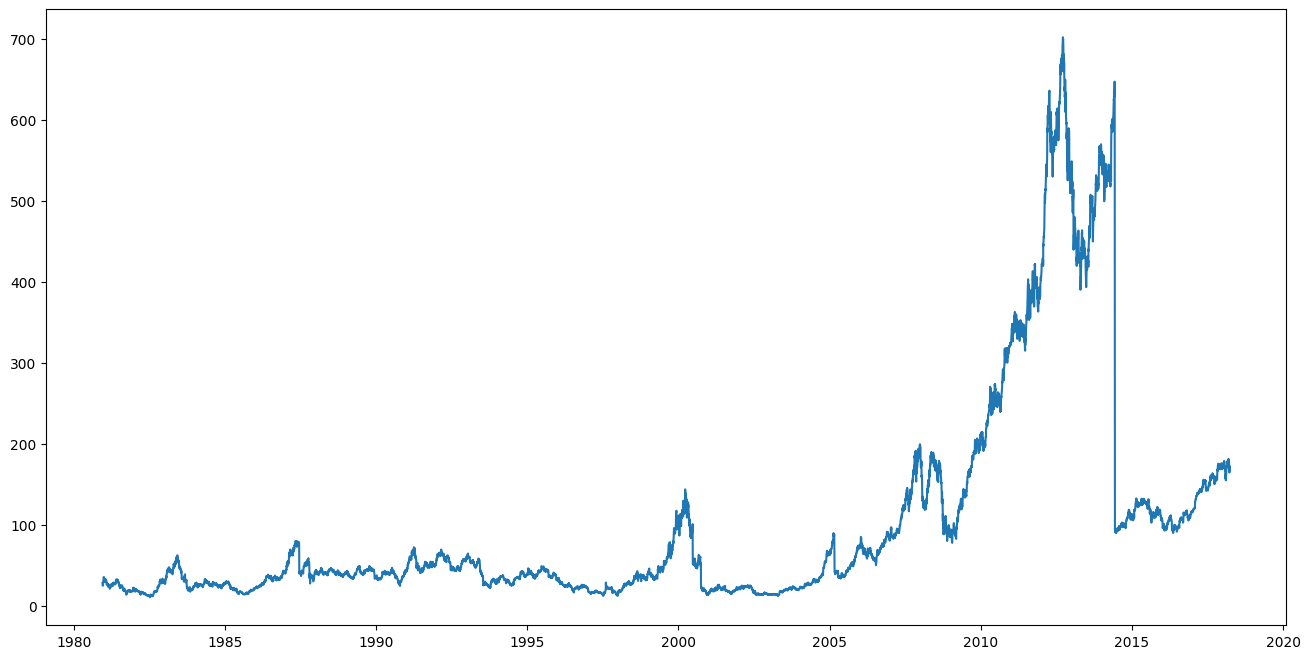

In [4]:
plt.figure(figsize=(16,8))
plt.plot(data.Close, label="closing price")


In [5]:
moving_average100 = data.Close.rolling(100).mean()
moving_average200 = data.Close.rolling(200).mean()

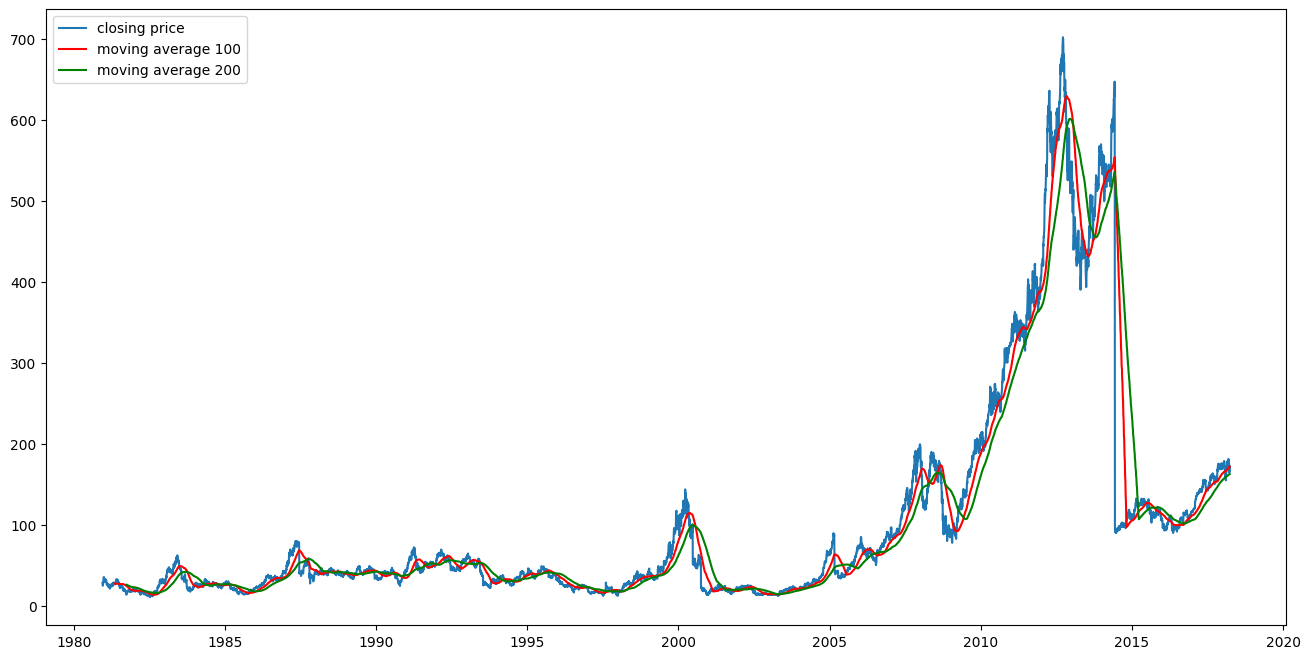

In [6]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label="closing price")
plt.plot(moving_average100, 'r', label="moving average 100")
plt.plot(moving_average200, 'g', label="moving average 200")
plt.legend()

In [7]:
data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])

In [8]:
data_testing.head()

,Close
Date,
2007-01-11,95.80
2007-01-12,94.62
2007-01-16,97.10
2007-01-17,94.95
2007-01-18,89.07


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.13326826],
       [0.12200616],
       [0.10699001],
       ...,
       [0.55912606],
       [0.61243337],
       [0.64569412]])

In [11]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [13]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 71s 315ms/step - loss: 0.0117
Epoch 2/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 61s 302ms/step - loss: 0.0033
Epoch 3/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 85s 319ms/step - loss: 0.0027
Epoch 4/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 61s 302ms/step - loss: 0.0022
Epoch 5/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 83s 309ms/step - loss: 0.0018
Epoch 6/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 63s 312ms/step - loss: 0.0021
Epoch 7/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 83s 319ms/step - loss: 0.0017
Epoch 8/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 81s 315ms/step - loss: 0.0016
Epoch 9/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 63s 310ms/step - loss: 0.0015
Epoch 10/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 81s 303ms/step - loss: 0.0016
Epoch 11/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 84s 312ms/step - loss: 0.0014
Epoch 12/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 83s 317ms/step - loss: 0.0014
Epoch 13/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 81s 314ms/step - loss: 0.0014
Epoch 14/50
203/203 ━━━━━━━━━━━━━━━━━━━━ 83s 319ms/step - loss: 0.0012
Epoch 15/50
203

In [16]:
model.save('keras_model.h5')

In [18]:
data_testing.head()

,Close
Date,
2007-01-11,95.80
2007-01-12,94.62
2007-01-16,97.10
2007-01-17,94.95
2007-01-18,89.07


In [20]:
past100 = data_training.tail(100)

final_data = pd.concat([past100, data_testing], ignore_index=True)

final_data.head()

,Close
0,67.59
1,67.91
2,66.56
3,67.62
4,67.31


In [22]:
input_data = scaler.fit_transform(final_data)

input_data

array([[1.74632642e-03],
       [2.24977188e-03],
       [1.25861364e-04],
       ...,
       [1.54903873e-01],
       [1.67222554e-01],
       [1.60252981e-01]])

In [23]:
input_data.shape

(2920, 1)

In [24]:
x_test = []
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

x_test.shape

(2820, 100, 1)

In [25]:
y_predict = model.predict(x_test)
y_predict.shape

89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step


(2820, 1)

In [26]:
y_predict

array([[0.09480792],
       [0.09704803],
       [0.09891744],
       ...,
       [0.18591827],
       [0.18386048],
       [0.18340611]], dtype=float32)

In [27]:
scaler.scale_

array([0.00157327])

In [28]:
scaler_factor = 1/0.00157327
y_predict = y_predict * scaler_factor
y_test = y_test * scaler_factor

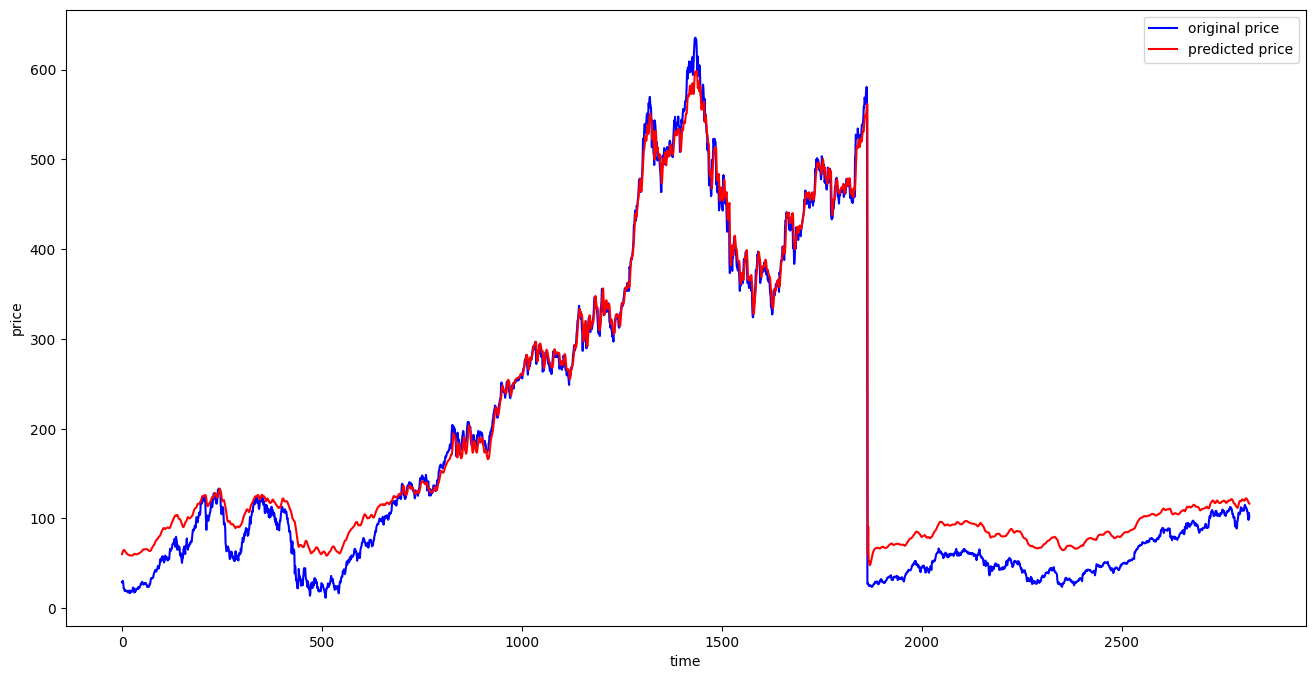

In [29]:
plt.figure(figsize=(16,8))
plt.plot(y_test, 'b', label='original price')
plt.plot(y_predict, 'r', label='predicted price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()